### Process of Harris Corner Detection Algorithm
1. Color to grayscale
2. Spatial derivative calculation
3. Structure tensor setup
4. Harris response calculation
5. Non-maximum suppression

#### Step 1 : Color to grayscale

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img = imread('resources/box.jpg')
imggray = rgb2gray(img)

plt.imshow(imggray, cmap="gray")
plt.axis("off")
plt.show()

#### Step 2 : Spatial derivative calculation

In [2]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

#### Step 3 : Structure tensor setup

In [3]:
Ixx = I_x**2
Ixy = I_y*I_x
Iyy = I_y**2

#### Step 4: Harris response calculation

In [4]:
#Loop through image and find our corners
k = 0.05

height, width = imggray.shape
harris_response = []
window_size = 6
offset = window_size/2
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        
        #Find determinant and trace, use to get corner response
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - k*(trace**2)
        
        harris_response.append([x,y, r])

#### Step 5: Non-maximum suppression
1. Edge : r < 0
2. Corner : r > 0
3. Flat: r = 0

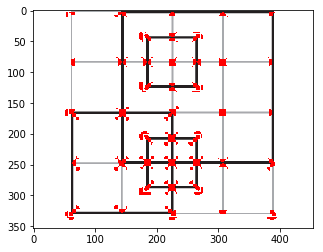

In [5]:
img_copy = np.copy(img)

for response in harris_response:
    x, y, r = response
    if r > 0:
        img_copy[y,x] = [255,0,0]

        
plt.imshow(img_copy)
plt.show()

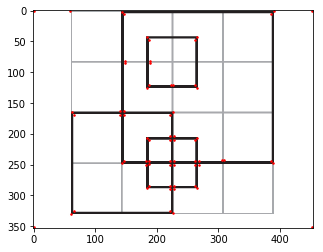

In [6]:
#Harris corner detection using skimage library
from skimage.feature import corner_harris, corner_peaks
# print corner_harris(ximage)
coords = corner_peaks(corner_harris(imggray))

fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)